<a href="https://colab.research.google.com/github/bandido007/Diabetes-Prediction-using-Logistic-regression./blob/main/California%20Housing%2C%20Regression%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tostaoilynchally","key":"fd12fc2aaefc4db94a2c08d3af0b010a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 22.2MB/s]


In [4]:
!unzip /content/california-housing-prices.zip

Archive:  /content/california-housing-prices.zip
  inflating: housing.csv             


In [5]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [6]:
df= pd.read_csv ('housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


there are missing values in the total_bedroom attribute

also except the ocean_proximity all values are numerical

In [9]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [10]:
df.describe() # its shows the summary of numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


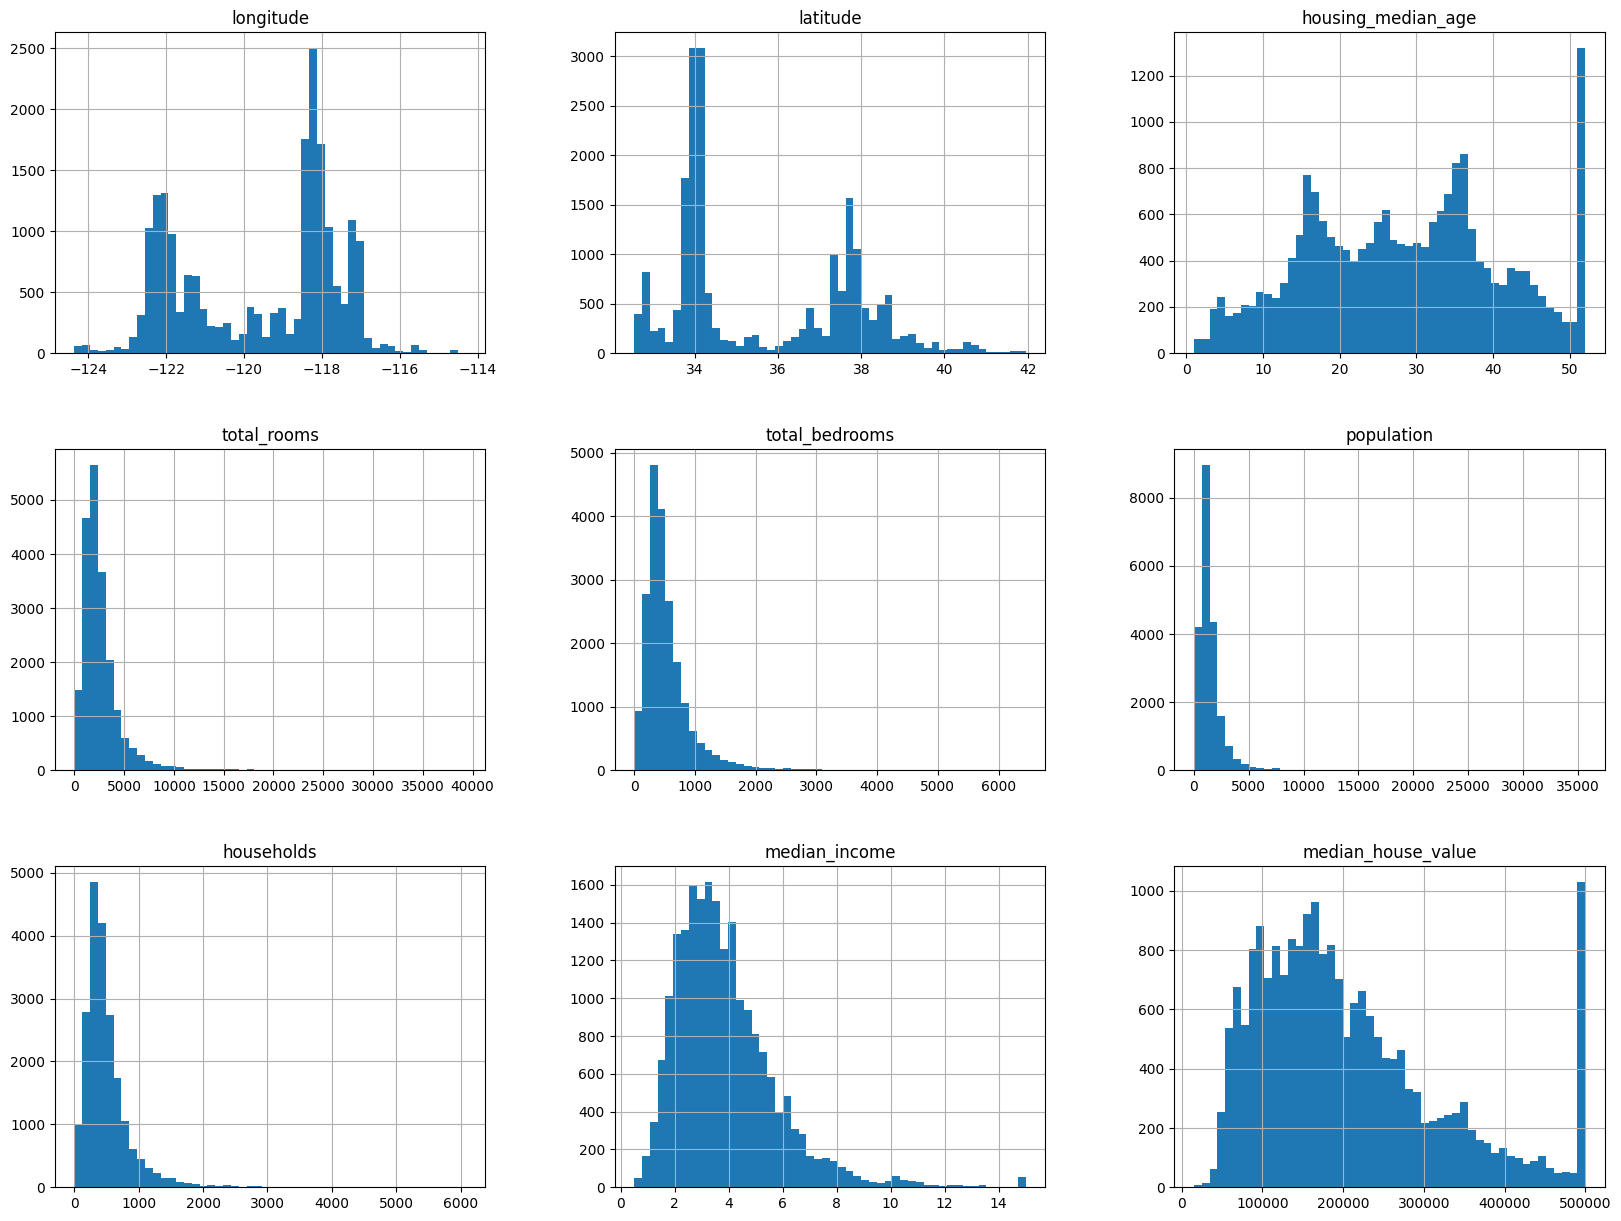

In [11]:
#histogram
df.hist(bins =50 , figsize = (20, 15))
plt.show()

the median_income  , seems to be uniform distributed while it is different for others which are more right skewed .

<Axes: xlabel='longitude', ylabel='latitude'>

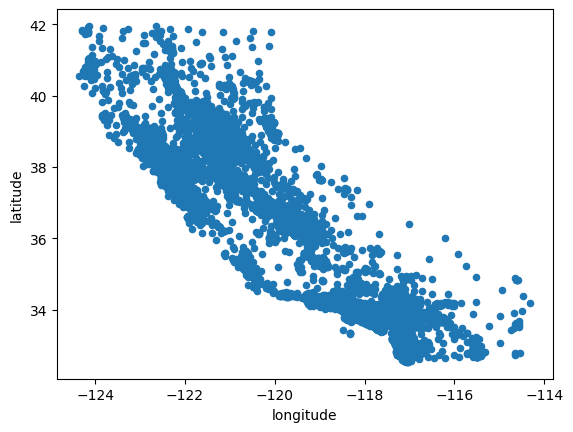

In [12]:
#indepth data visualization 1, geographical distribution insights
df.plot(kind= 'scatter' , x = 'longitude' , y = 'latitude')



do you recognize anything , what patterns can you determine

<Axes: xlabel='longitude', ylabel='latitude'>

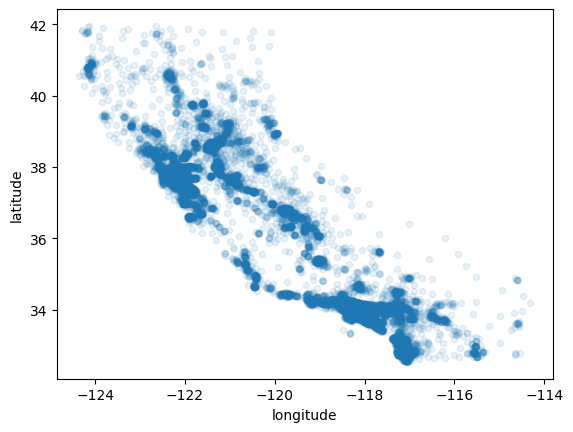

In [13]:
df.plot(kind= 'scatter', x= 'longitude' , y='latitude'  , alpha = 0.1)

there are highly dense areas represented by high concentration of blue concentrated dots

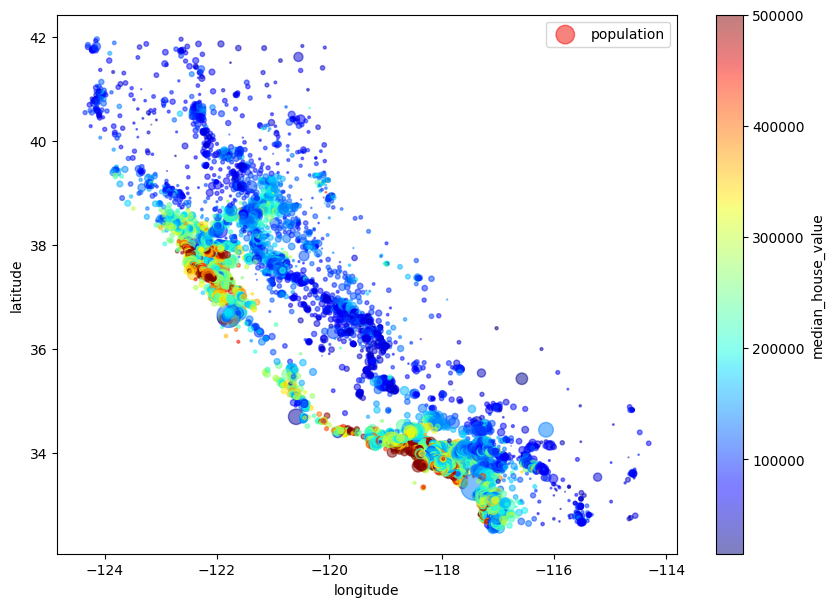

In [14]:
df.plot(kind= "scatter", x ="longitude" , y = "latitude" , alpha= 0.5 ,
        s= df["population"]/100 , label= "population", figsize= (10,7),
                c="median_house_value" , cmap= plt.get_cmap("jet"),
        colorbar =True )
plt.legend()

clear indication that the housing prices are highly related to the location and to the population density.
note: this is the californiaa costline

In [15]:
#correlations
corr_matrix = df.drop("ocean_proximity" , axis= 1).corr()
corr_matrix["median_house_value"].sort_values(ascending =False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


<Axes: xlabel='median_income', ylabel='median_house_value'>

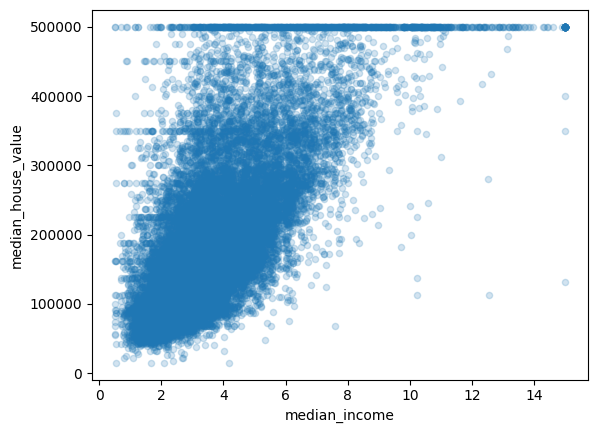

In [16]:
#correlation between median_income and median_house_value , graphically
df.plot(kind= "scatter" , x= "median_income" ,y="median_house_value", alpha= 0.2 )

There's a clear positive correlation between median income and median house value. As income increases, house values tend to increase as well.

In [17]:
#attribute Combinations
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

In [18]:
#new correlation after attribute combinations
corr_matrix = df.drop("ocean_proximity" , axis =1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


there is a cahnge in the table from previous one
-  The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms.
-
-The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.

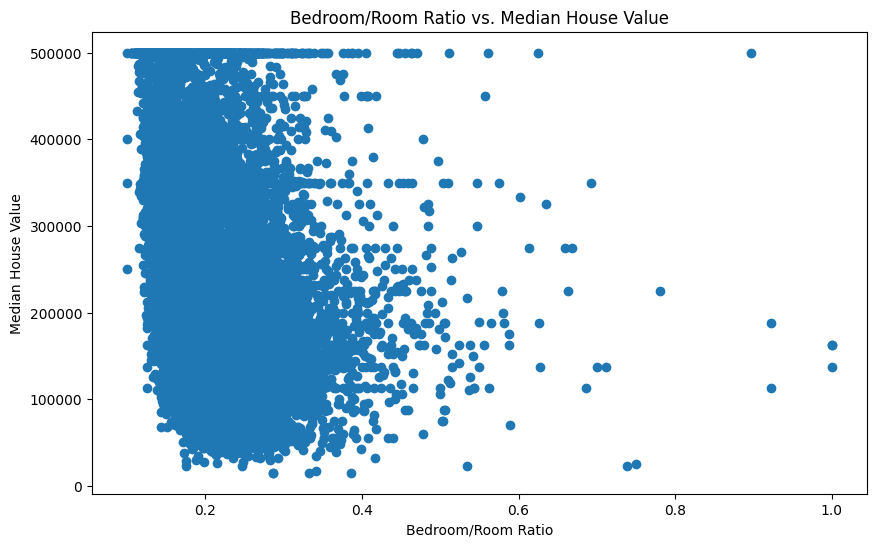

In [19]:
# Plot the relationship between bedroom/room ratio and median house value
plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms_per_room'], df['median_house_value'])
plt.title('Bedroom/Room Ratio vs. Median House Value')
plt.xlabel('Bedroom/Room Ratio')
plt.ylabel('Median House Value')
plt.show()

This plot would show that as the bedroom/room ratio decreases, the median house value tends to increase, reinforcing the idea that homes with more versatile living spaces (lower bedroom/room ratios) are valued higher.

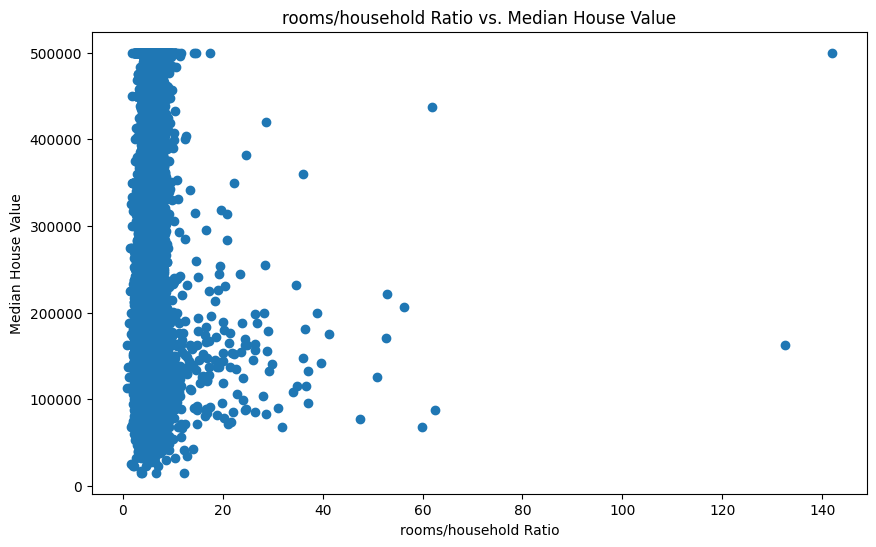

In [20]:
# Plot the relationship between rooms/household ratio and median house value
plt.figure(figsize=(10, 6))
plt.scatter(df['rooms_per_household'], df['median_house_value'])
plt.title('rooms/household Ratio vs. Median House Value')
plt.xlabel('rooms/household Ratio')
plt.ylabel('Median House Value')
plt.show()

In [21]:
#now we are going to deal with missing feature by setting values to the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df2= df.drop("ocean_proximity", axis=1)
imputer.fit(df2)
#the above process , "The imputer has simply computed the median of each attribute and stored the result
#in its statistics_ instance variable."
x = imputer.transform(df2)
df2 = pd.DataFrame(x, columns=df2.columns, index=df2.index)

#returning the dropped ocean_proximity
df2["ocean_proximity"] = df["ocean_proximity"]
#the above process has then transformed the trained imputer go transform it by reaplcing missing values by the learned medians

In [22]:
df2.info("total_bedrooms")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  bedrooms_per_room         20640 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  ocean_proximity           20640 non-null  object 
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


no more missing values , imputation has been successfully executed by treating the missing values

In [23]:
df2["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [24]:
#Convert categorical features into dummy variables
df2_cat= pd.get_dummies(df2["ocean_proximity"], prefix ="ocean")

#Display the first few rows to verify the dummy variables
print(df2_cat.head())

   ocean_<1H OCEAN  ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  \
0            False         False         False            True   
1            False         False         False            True   
2            False         False         False            True   
3            False         False         False            True   
4            False         False         False            True   

   ocean_NEAR OCEAN  
0             False  
1             False  
2             False  
3             False  
4             False  


In [25]:
df2_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ocean_<1H OCEAN   20640 non-null  bool 
 1   ocean_INLAND      20640 non-null  bool 
 2   ocean_ISLAND      20640 non-null  bool 
 3   ocean_NEAR BAY    20640 non-null  bool 
 4   ocean_NEAR OCEAN  20640 non-null  bool 
dtypes: bool(5)
memory usage: 100.9 KB


In [26]:
df2 = pd.concat([df2, df2_cat], axis=1)
df2 = df2.drop("ocean_proximity", axis=1)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  bedrooms_per_room         20640 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  ocean_<1H OCEAN           20640 non-null  bool   
 13  ocean_INLAND              20640 non-null  bool   
 14  ocean_

In [28]:
#new correlation after attribute combinations
corr_matrix = df2.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_<1H OCEAN,0.256617
ocean_NEAR BAY,0.160284
rooms_per_household,0.151948
ocean_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457


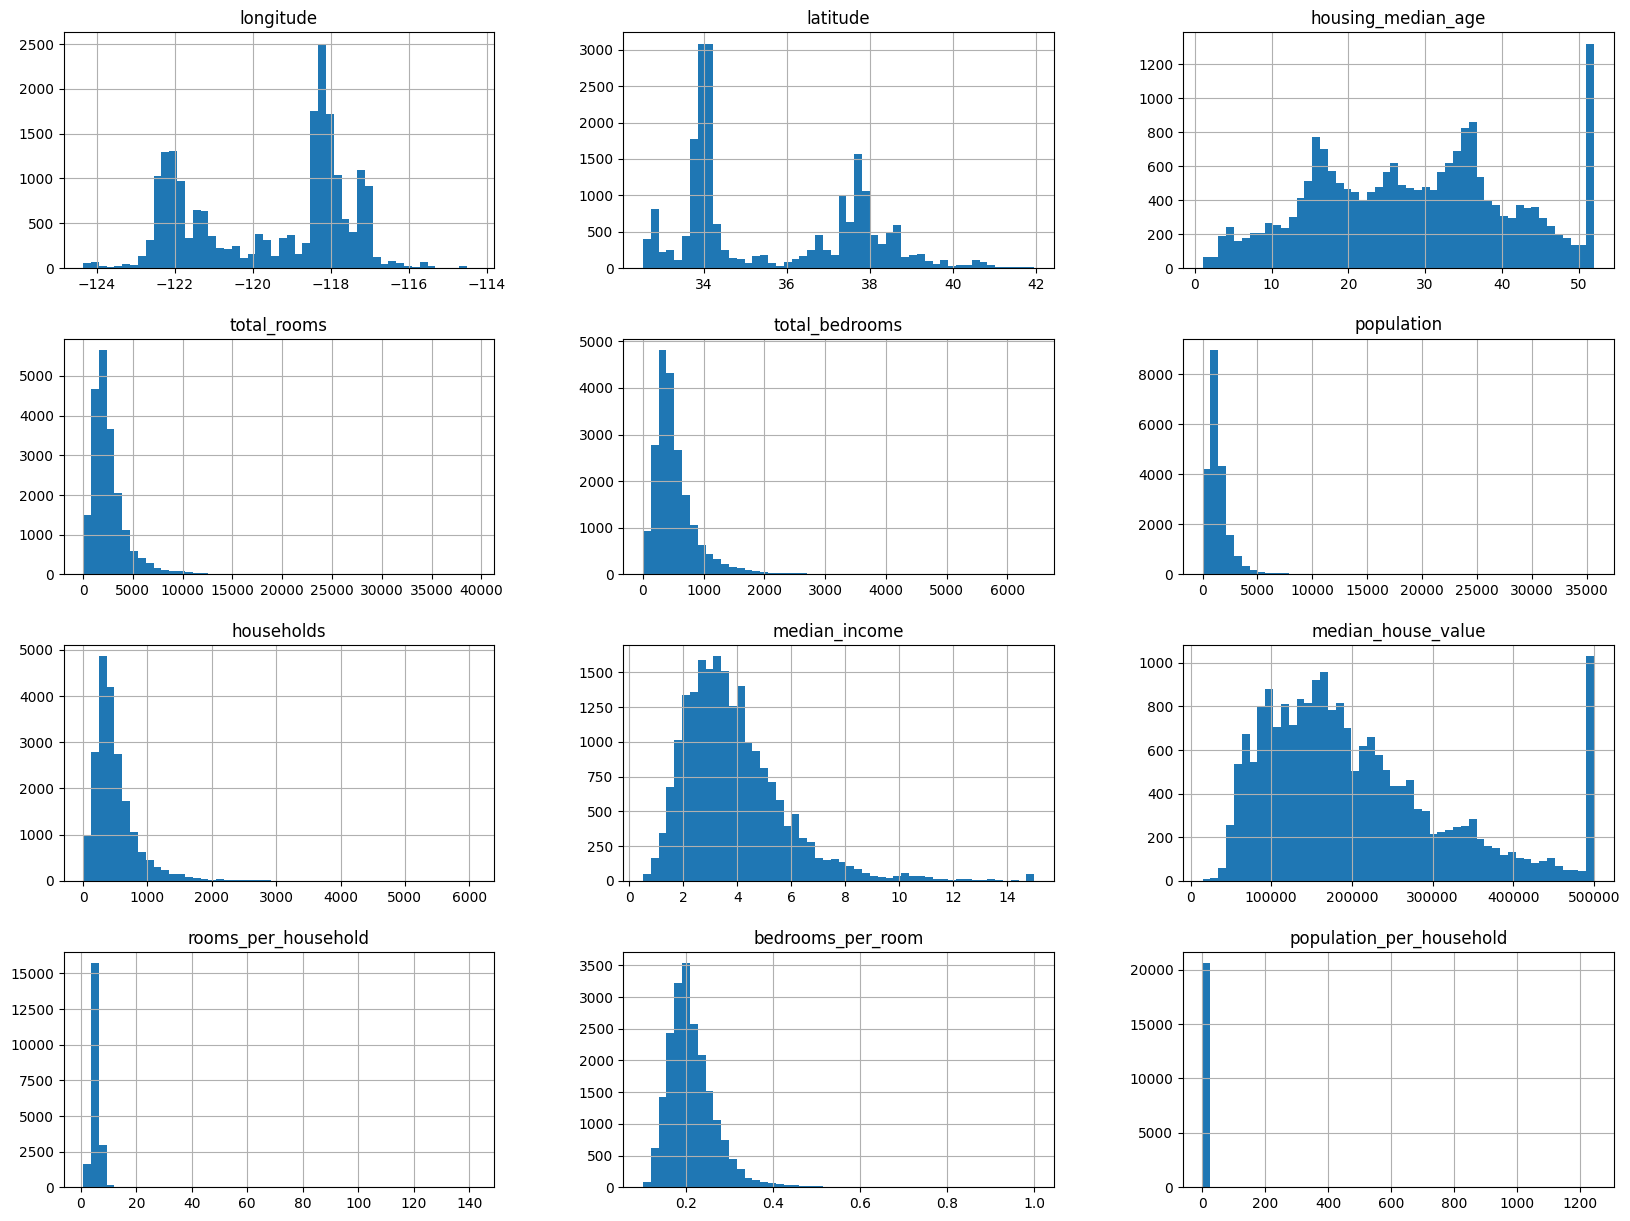

In [29]:
df2.hist(bins =50 , figsize = (20, 15))
plt.show()

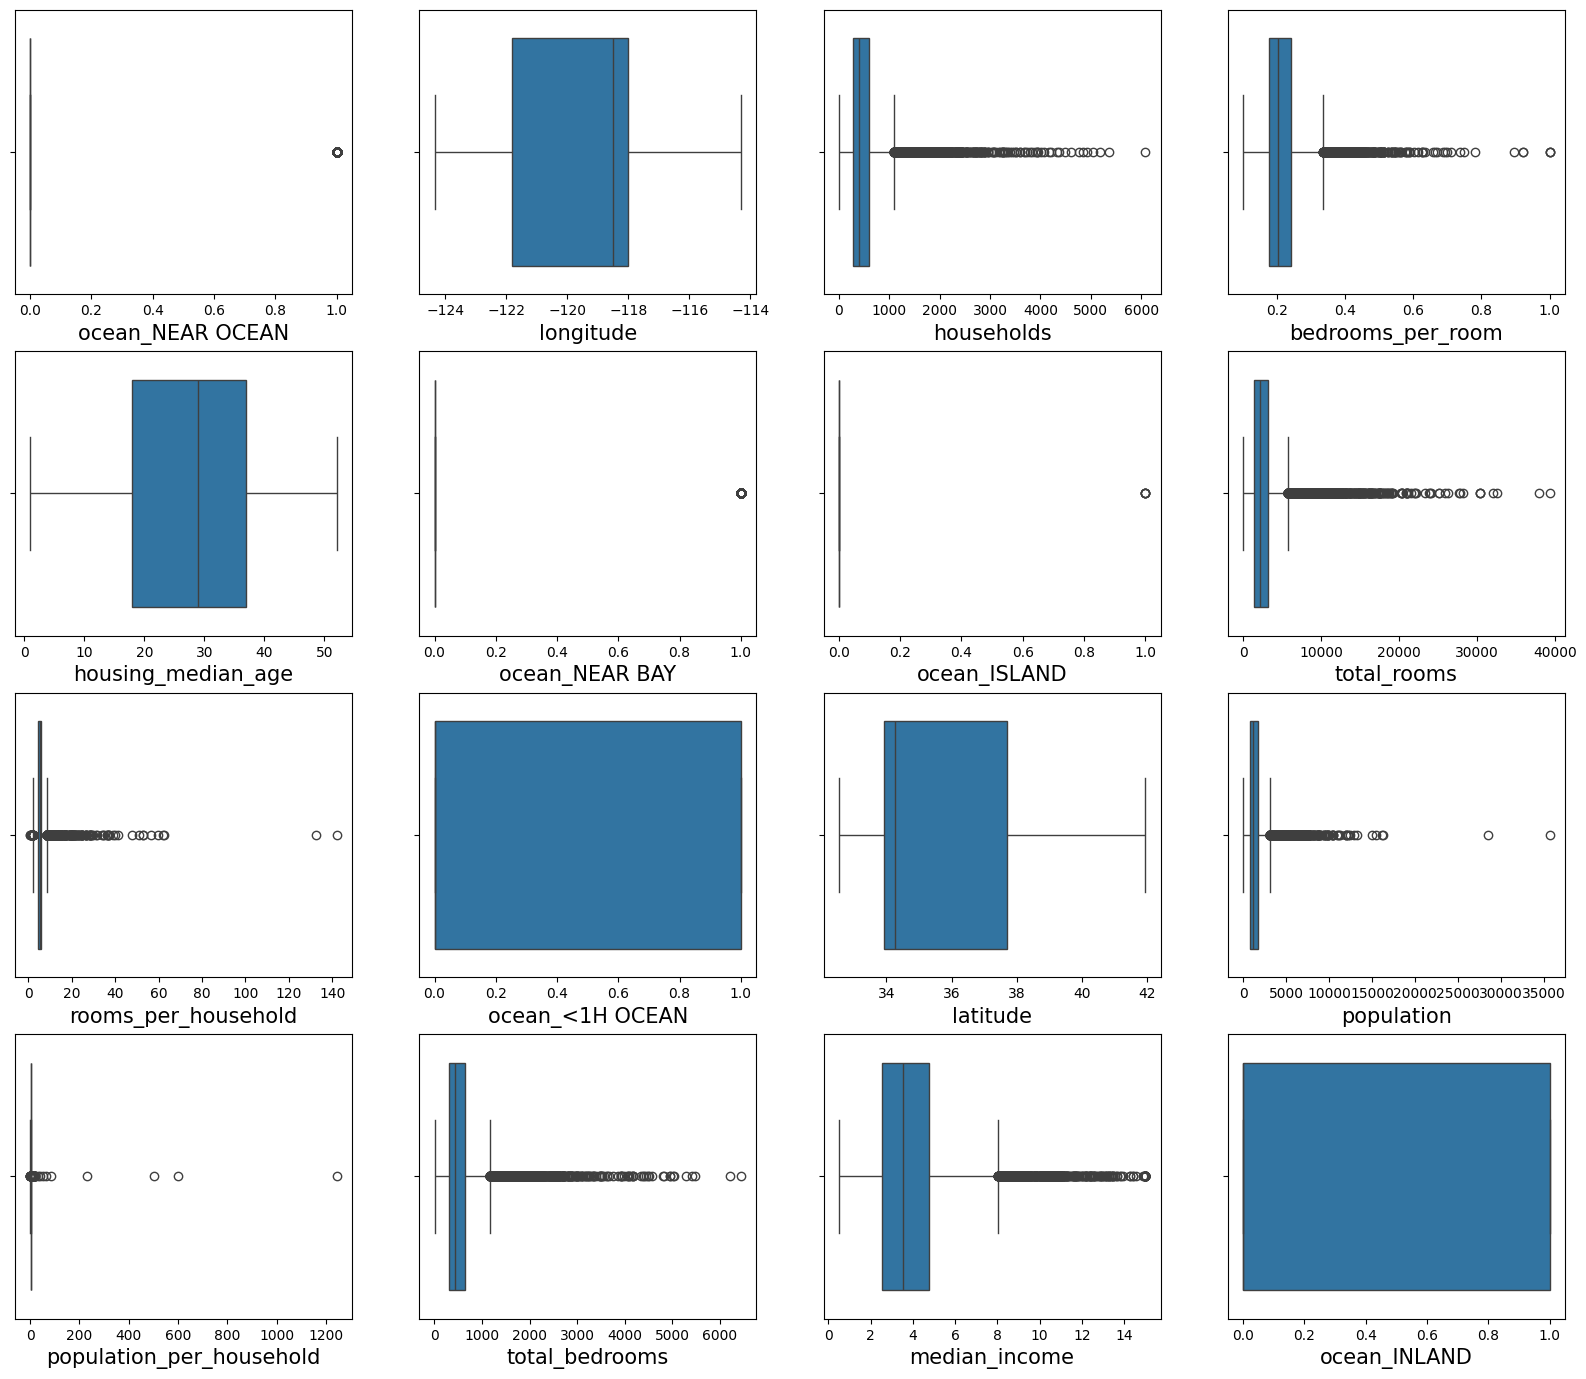

In [30]:
#lets us look on the presence of  outliers
plt.figure(figsize=(20,17))
for i,col in enumerate(set(df2.columns)-{'median_house_value'}):
 plt.subplot(4,4,i+1)
 sns.boxplot(df2,x=col)
 plt.xlabel(col, fontsize=15)
 plt.xticks(fontsize=10)

In [31]:
#dealing with outliers
# applying the method of winsorization
def detect_outliers(df2):
    outlier_data= []
    for col in list(set(df2.select_dtypes(include=np.number).columns)-{'Outcome'}):
        q1 = df2[col].quantile(0.25)
        q3 = df2[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5*iqr)
        high = q3 + (1.5*iqr)
        n = df2.loc[(df2[col] < low) | (df2[col] > high)].shape[0]

        df2.loc[(df2[col] < low),col] = low
        df2.loc[(df2[col] > high),col] = high
        outlier_data.append({'Feature': col, "No.of Outliers": n, "Handled?": True})

    # Create a DataFrame from the collected outlier data
    outliers = pd.DataFrame(outlier_data)
    return outliers

# Usage:
outliers_summary = detect_outliers(df2)
print(outliers_summary)


                     Feature  No.of Outliers  Handled?
0                total_rooms            1287      True
1        rooms_per_household             511      True
2                  longitude               0      True
3                 households            1220      True
4         median_house_value            1071      True
5                   latitude               0      True
6                 population            1196      True
7   population_per_household             711      True
8             total_bedrooms            1306      True
9              median_income             681      True
10         bedrooms_per_room             604      True
11        housing_median_age               0      True


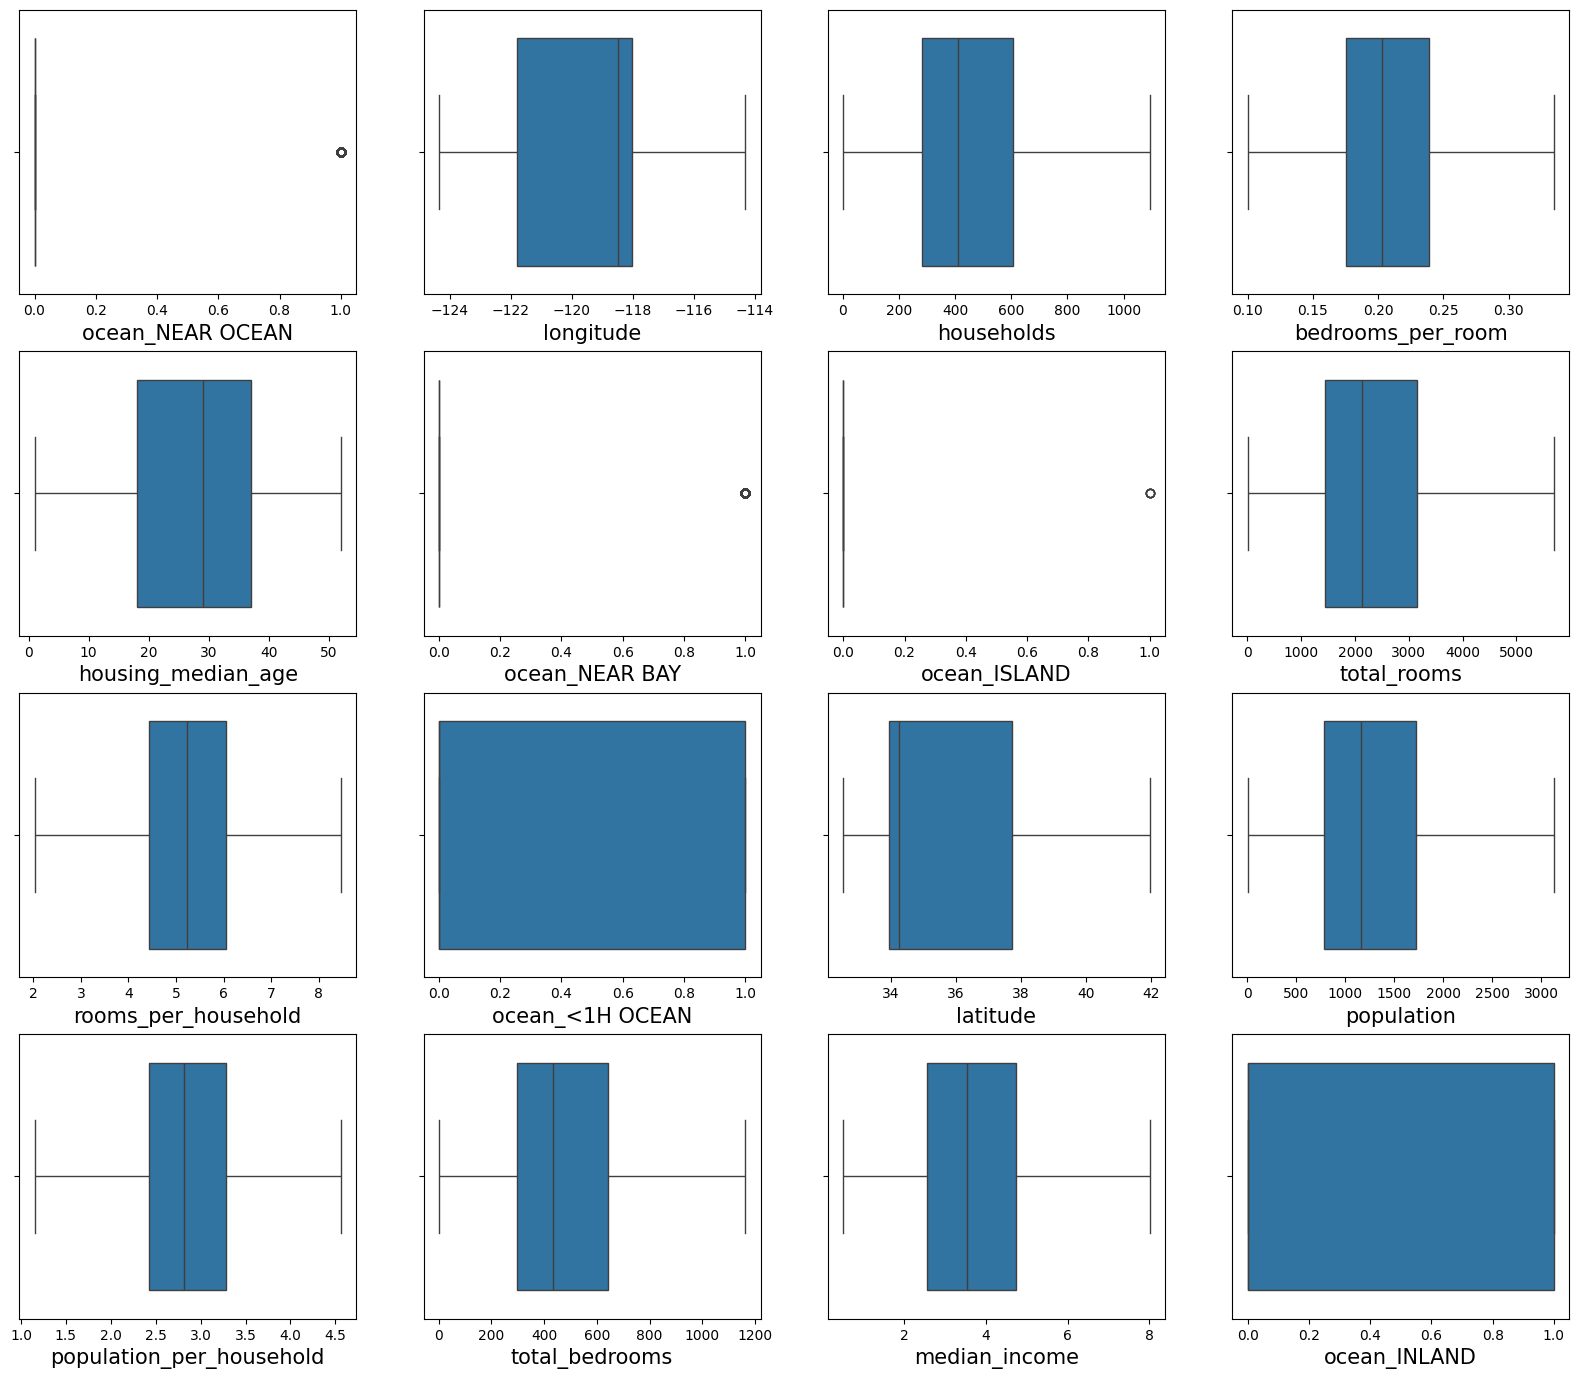

In [32]:
#lets us look on the presence of  outliers
plt.figure(figsize=(20,17))
for i,col in enumerate(set(df2.columns)-{'median_house_value'}):
 plt.subplot(4,4,i+1)
 sns.boxplot(df2,x=col)
 plt.xlabel(col, fontsize=15)
 plt.xticks(fontsize=10)

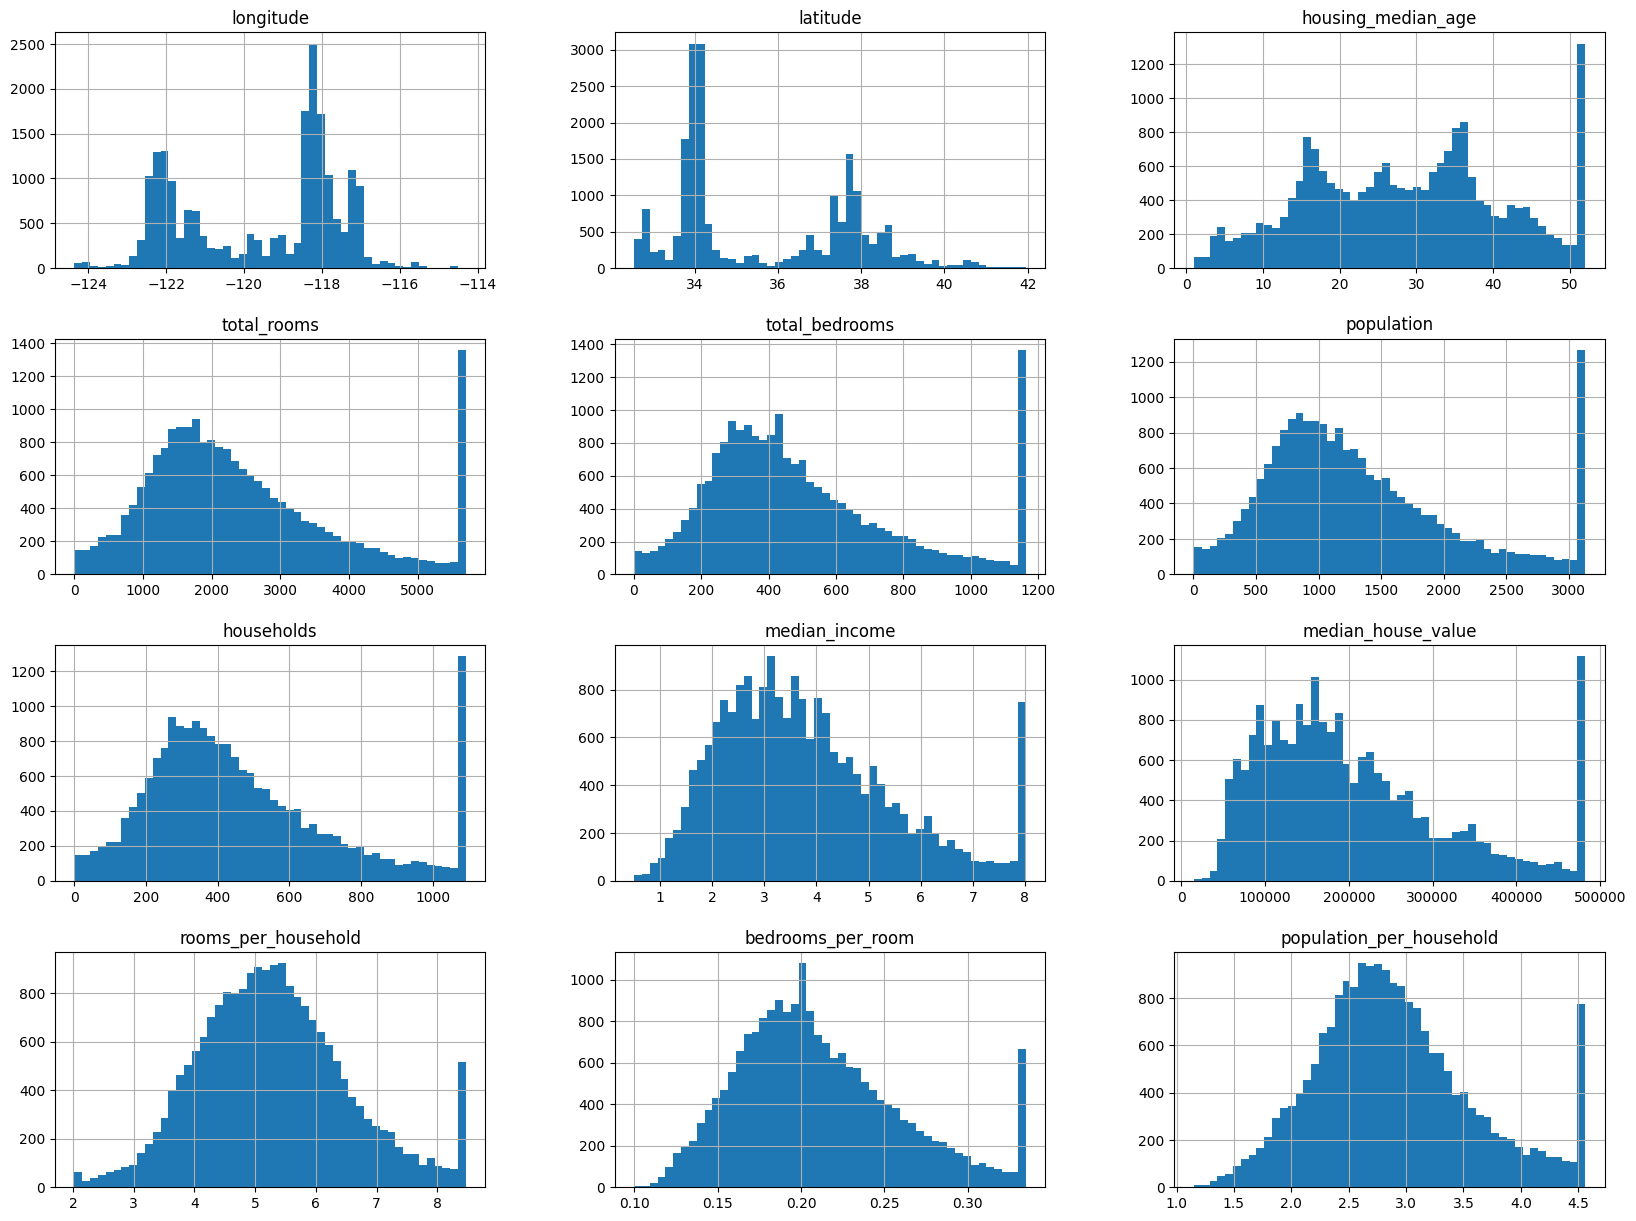

In [33]:
df2.hist(bins =50 , figsize = (20, 15))
plt.show()

In [34]:
#dealing with the skewed data by making it to normal distribution
import numpy as np

# List of variables that appear heavily right-skewed
skewed_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value',
                   'rooms_per_household' ,'bedrooms_per_room', 'population_per_household']

# Apply log transformation
for feature in skewed_features:
    # Add a small constant (1) to avoid log(0)
    df2[f'{feature}_log'] = np.log1p(df2[feature])


# Verify the transformations
df2[skewed_features + [f'{f}_log' for f in skewed_features]].describe()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log,median_house_value_log,rooms_per_household_log,bedrooms_per_room_log,population_per_household_log
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2441.692472,501.182086,1336.959012,469.020107,3.801010,205981.224976,5.304740,0.210764,2.899647,7.606438,6.033420,7.005905,5.964958,1.510535,12.083110,1.821500,0.190447,1.345444
std,1397.790038,284.133641,765.550830,265.507540,1.657658,113217.350152,1.246177,0.048927,0.691142,0.706824,0.682519,0.699432,0.689783,0.342946,0.565929,0.200776,0.039965,0.175597
min,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,2.023219,0.100000,1.150961,1.098612,0.693147,1.386294,0.693147,0.405398,9.615805,1.106322,0.095310,0.765915
25%,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175708,2.429741,7.278456,5.697093,6.669498,5.638355,1.270715,11.691916,1.693911,0.161870,1.232485
50%,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116,7.662938,6.077642,7.062192,6.016157,1.511781,12.099050,1.829236,0.184953,1.339757
75%,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239273,3.282261,8.054840,6.468087,7.453562,6.406880,1.748025,12.486451,1.953365,0.214525,1.454481
max,5698.375000,1162.625000,3132.000000,1092.500000,8.013025,482412.500000,8.469878,0.334620,4.561041,8.648112,7.059295,8.049746,6.997139,2.198671,13.086557,2.248116,0.288647,1.715785


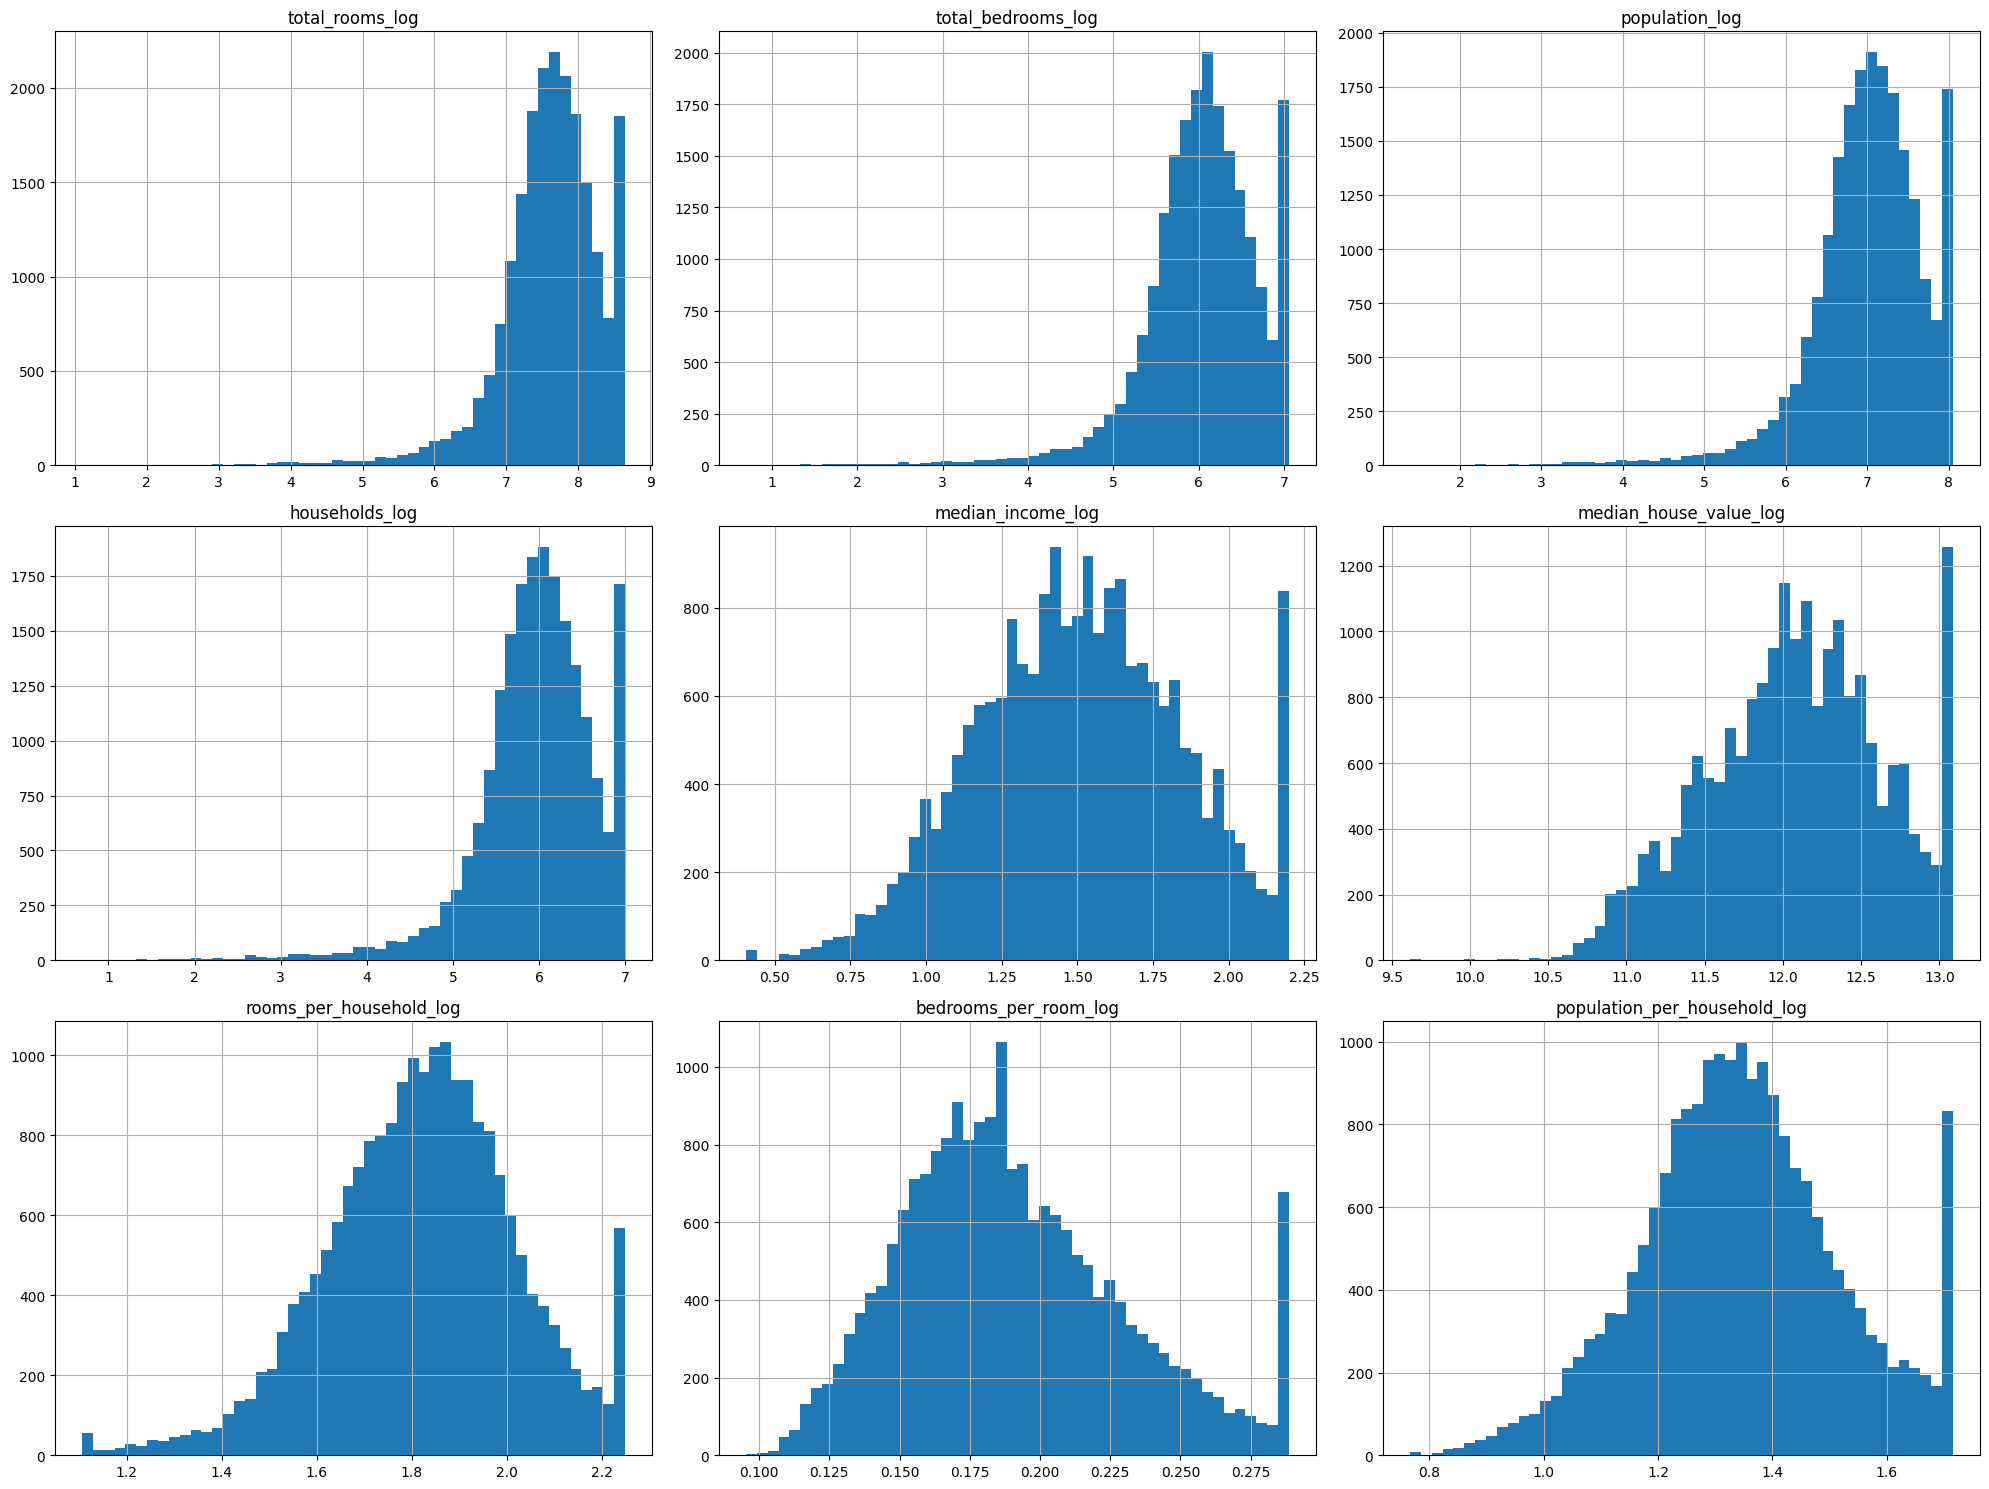

In [35]:
df2[[f'{f}_log' for f in skewed_features]].hist(bins = 50 , figsize=(20,15))
plt.tight_layout()
plt.show()

In [36]:
for feature in skewed_features:
    print(f"{feature}:")
    print(f"  Original skewness: {df2[feature].skew():.2f}")
    print(f"  Log-transformed skewness: {df2[f'{feature}_log'].skew():.2f}\n")

total_rooms:
  Original skewness: 0.84
  Log-transformed skewness: -1.57

total_bedrooms:
  Original skewness: 0.86
  Log-transformed skewness: -1.46

population:
  Original skewness: 0.84
  Log-transformed skewness: -1.46

households:
  Original skewness: 0.84
  Log-transformed skewness: -1.47

median_income:
  Original skewness: 0.74
  Log-transformed skewness: -0.04

median_house_value:
  Original skewness: 0.91
  Log-transformed skewness: -0.20

rooms_per_household:
  Original skewness: 0.35
  Log-transformed skewness: -0.28

bedrooms_per_room:
  Original skewness: 0.64
  Log-transformed skewness: 0.54

population_per_household:
  Original skewness: 0.51
  Log-transformed skewness: 0.03



In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     20640 non-null  float64
 1   latitude                      20640 non-null  float64
 2   housing_median_age            20640 non-null  float64
 3   total_rooms                   20640 non-null  float64
 4   total_bedrooms                20640 non-null  float64
 5   population                    20640 non-null  float64
 6   households                    20640 non-null  float64
 7   median_income                 20640 non-null  float64
 8   median_house_value            20640 non-null  float64
 9   rooms_per_household           20640 non-null  float64
 10  bedrooms_per_room             20640 non-null  float64
 11  population_per_household      20640 non-null  float64
 12  ocean_<1H OCEAN               20640 non-null  bool   
 13  o

In [45]:

corr_matrix = df2.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_house_value_log,0.950512
median_income,0.689654
median_income_log,0.658297
rooms_per_household,0.309365
rooms_per_household_log,0.281940
ocean_<1H OCEAN,0.259938
total_rooms,0.173622
total_rooms_log,0.162429
ocean_NEAR BAY,0.161112


In [46]:
#Modeling and evaluation

In [47]:
# Select features
selected_features = [
    'median_income_log','rooms_per_household_log', 'ocean_<1H OCEAN',
    'total_rooms_log', 'ocean_NEAR BAY' ,'ocean_NEAR OCEAN',
    'housing_median_age', 'households_log', 'total_bedrooms_log',
    'longitude', 'latitude', 'population_per_household_log',
    'bedrooms_per_room_log', 'ocean_INLAND'
]

# Prepare the data
X = df2[selected_features]
y = df2['median_house_value_log']  # Using log-transformed target

In [48]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [50]:
#on training data
#evaluating Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lin_reg.predict(X_train)

tree_mse = mean_squared_error(y_train, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
tree_r2 = r2_score(y_train, y_pred)
tree_r2

print(f"Mean Squared Error: {tree_mse}")
print(f"Root Mean Squared Error: {tree_rmse}")
print(f"R-squared Score: {tree_r2}")

Mean Squared Error: 0.09320681166799394
Root Mean Squared Error: 0.3052979064258285
R-squared Score: 0.70874101839861


In [51]:
#evaluating Linear Regression on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lin_reg.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
tree_r2 = r2_score(y_test, y_pred)
tree_r2

print(f"Mean Squared Error: {tree_mse}")
print(f"Root Mean Squared Error: {tree_rmse}")
print(f"R-squared Score: {tree_r2}")

Mean Squared Error: 0.10057558054618587
Root Mean Squared Error: 0.31713653297308064
R-squared Score: 0.6868705013712924


In [52]:
#RegressionTree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
#evaluating Decision Tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = tree_reg.predict(X_train)

tree_mse = mean_squared_error(y_train, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
tree_r2 = r2_score(y_train, y_pred)
tree_r2

print(f"Mean Squared Error: {tree_mse}")
print(f"Root Mean Squared Error: {tree_rmse}")
print(f"R-squared Score: {tree_r2}")

Mean Squared Error: 2.357983214516004e-30
Root Mean Squared Error: 1.5355726015125445e-15
R-squared Score: 1.0


In [54]:
#evaluating Decision Tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = tree_reg.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
tree_r2 = r2_score(y_test, y_pred)
tree_r2

print(f"Mean Squared Error: {tree_mse}")
print(f"Root Mean Squared Error: {tree_rmse}")
print(f"R-squared Score: {tree_r2}")

Mean Squared Error: 0.10620033850677603
Root Mean Squared Error: 0.3258839341035026
R-squared Score: 0.6693585205252199


In [55]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
#on train data
#evaluating RandomForest
y_pred = forest_reg.predict(X_train)

forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
forest_r2 = r2_score(y_train, y_pred)
forest_r2

print(f"Mean Squared Error: {forest_mse}")
print(f"Root Mean Squared Error: {forest_rmse}")
print(f"R-squared Score: {forest_r2}")

Mean Squared Error: 0.0072416288019575455
Root Mean Squared Error: 0.08509776026404893
R-squared Score: 0.977370866010239


In [57]:
#evaluating RandomForest
y_pred = forest_reg.predict(X_test)

forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
forest_r2 = r2_score(y_test, y_pred)
forest_r2

print(f"Mean Squared Error: {forest_mse}")
print(f"Root Mean Squared Error: {forest_rmse}")
print(f"R-squared Score: {forest_r2}")

Mean Squared Error: 0.052667221999125026
Root Mean Squared Error: 0.22949340295338563
R-squared Score: 0.8360271874227001


In [58]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("decision tree scores:", tree_rmse_scores)
print("decision tree mean:", tree_rmse_scores.mean())
print("decision tree standard deviation:", tree_rmse_scores.std())

scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)

print("\n")
print("linear regression scores:", lin_reg_rmse_scores)
print("linear regression mean:", lin_reg_rmse_scores.mean())
print("linear regression standard deviation:", lin_reg_rmse_scores.std())


scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)


print("\n")

print("random forest scores:", forest_rmse_scores)
print("random forest mean:", forest_rmse_scores.mean())
print("random forest standard deviation:", forest_rmse_scores.std())

decision tree scores: [0.32396972 0.32543662 0.31950653 0.32810147 0.33829281 0.32024786
 0.32360257 0.32904866 0.3210948  0.32179252]
decision tree mean: 0.3251093566855926
decision tree standard deviation: 0.005330050096575078


linear regression scores: [0.29905188 0.3159424  0.29784305 0.30196826 0.31257419 0.29830282
 0.30165834 0.30744893 0.30468305 0.3182107 ]
linear regression mean: 0.3057683627081612
linear regression standard deviation: 0.007096712861868378


random forest scores: [0.22690949 0.23297562 0.22545596 0.23614338 0.23885759 0.21846867
 0.22970086 0.23942374 0.22636306 0.22837919]
random forest mean: 0.23026775583178832
random forest standard deviation: 0.006263043260438196


In [59]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [60]:
#on train data
#evaluating  GradientBoosting
y_pred = gb_reg.predict(X_train)

gb_reg_mse = mean_squared_error(y_train ,y_pred)
gb_reg_rmse = np.sqrt(gb_reg_mse)
gb_reg_r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {gb_reg_mse}")
print(f"Root Mean Squared Error: {gb_reg_rmse}")
print(f"R-squared Score: {gb_reg_r2}")

Mean Squared Error: 0.057335919661873305
Root Mean Squared Error: 0.23944920058725047
R-squared Score: 0.8208328203588712


In [61]:
#evaluating  GradientBoosting
y_pred = gb_reg.predict(X_test)

gb_reg_mse = mean_squared_error(y_test ,y_pred)
gb_reg_rmse = np.sqrt(gb_reg_mse)
gb_reg_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {gb_reg_mse}")
print(f"Root Mean Squared Error: {gb_reg_rmse}")
print(f"R-squared Score: {gb_reg_r2}")

Mean Squared Error: 0.06470170585778336
Root Mean Squared Error: 0.2543653000269167
R-squared Score: 0.7985593261739503


In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
gb_reg_rmse_scores = np.sqrt(-scores)

print("Gradient Boosting scores:", gb_reg_rmse_scores)
print("Gradient Boosting mean:", gb_reg_rmse_scores.mean())
print("Gradient Boosting standard deviation:", gb_reg_rmse_scores.std())


Gradient Boosting scores: [0.25011747 0.25943783 0.24425246 0.25021535 0.25896485 0.23786499
 0.24685982 0.25815395 0.24776959 0.25243955]
Gradient Boosting mean: 0.2506075880135791
Gradient Boosting standard deviation: 0.006583131168370838
